In [1]:
import os
import numpy as np
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
path="data"
tables_name=os.listdir(path)
print(tables_name)

['admissiondrug.csv.gz', 'admissionDx.csv.gz', 'allergy.csv.gz', 'apacheApsVar.csv.gz', 'apachePatientResult.csv.gz', 'apachePredVar.csv.gz', 'carePlanCareProvider.csv.gz', 'carePlanEOL.csv.gz', 'carePlanGeneral.csv.gz', 'carePlanGoal.csv.gz', 'carePlanInfectiousDisease.csv.gz', 'customLab.csv.gz', 'diagnosis.csv.gz', 'hospital.csv.gz', 'infusiondrug.csv.gz', 'intakeOutput.csv.gz', 'lab.csv.gz', 'medication.csv.gz', 'microLab.csv.gz', 'note.csv.gz', 'nurseAssessment.csv.gz', 'nurseCare.csv.gz', 'nurseCharting.csv.gz', 'pastHistory.csv.gz', 'patient.csv.gz', 'physicalExam.csv.gz', 'respiratoryCare.csv.gz', 'respiratoryCharting.csv.gz', 'treatment.csv.gz', 'vitalAperiodic.csv.gz', 'vitalPeriodic.csv.gz']


In [3]:
tables={}
for element in tables_name:
    tables[element[0:element.find(".csv")]]=pd.read_csv(path+"/"+element)

C:\Users\ruben\AppData\Local\Temp\ipykernel_2796\2727197083.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  tables[element[0:element.find(".csv")]]=pd.read_csv(path+"/"+element)


In [4]:
table_name=list(tables.keys())

In [5]:
def le(col):
    col_list=list(col)
    labels={}
    for i in range(len(col_list)):
        if col_list[i] in labels:
            next
        else:
            labels[col_list[i]]=len(labels)
    col=col.replace(labels)
    return col, labels

In [6]:
pat_ex=3098657
for element in table_name:
    try:
        tabla=tables[element]
        print("**{}**".format(element))
        display(tabla[tabla["patientunitstayid"]==pat_ex])
    except:
        next

**admissiondrug**


,admissiondrugid,patientunitstayid,drugoffset,drugenteredoffset,drugnotetype,specialtytype,usertype,rxincluded,writtenineicu,drugname,drugdosage,drugunit,drugadmitfrequency,drughiclseqno
5919,16099381,3098657,2996,3023,Comprehensive Progress,eCM Primary,Attending Physician,True,False,LOSARTAN POTASSIUM ...,100.0,mg,daily,9829
5920,17149683,3098657,8031,8035,Follow-up Consultation/Other,nephrology,Attending Physician,False,False,LOSARTAN POTASSIUM ...,0.0,,,9829
5921,14630616,3098657,5052,5060,Follow-up Consultation/Other,nephrology,Attending Physician,False,False,LOSARTAN POTASSIUM ...,0.0,,,9829
5922,17558814,3098657,3128,3760,Comprehensive Progress,eCM Primary,Physician Assistant,False,False,OLANZAPINE ...,5.0,mg,daily,11814
5923,16735340,3098657,11061,11069,Comprehensive Progress,eCM Primary,Attending Physician,True,False,SIMVASTATIN ...,10.0,mg,daily,6312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,16512220,3098657,6826,6830,Follow-up Consultation/Other,nephrology,Attending Physician,False,False,LISINOPRIL ...,0.0,,,132
6137,15587795,3098657,2653,2664,Follow-up Consultation/Other,nephrology,Attending Physician,False,False,LASIX ...,0.0,,,3660
6138,16479173,3098657,5295,5298,Comprehensive Progress,eCM Primary,Attending Physician,True,False,CLONIDINE ...,0.1,mg,three times a day,36550
6139,15587796,3098657,2653,2664,Follow-up Consultation/Other,nephrology,Attending Physician,False,False,LISINOPRIL ...,0.0,,,132


**admissionDx**


,admissiondxid,patientunitstayid,admitdxenteredoffset,admitdxpath,admitdxname,admitdxtext
372,8576740,3098657,19,admission diagnosis|Was the patient admitted f...,No,No
373,8576742,3098657,19,admission diagnosis|All Diagnosis|Non-operativ...,Pancreatitis,Pancreatitis
374,8576741,3098657,19,admission diagnosis|Non-operative Organ System...,Gastrointestinal,Gastrointestinal


**allergy**


,allergyid,patientunitstayid,allergyoffset,allergyenteredoffset,allergynotetype,specialtytype,usertype,rxincluded,writtenineicu,drugname,allergytype,allergyname,drughiclseqno


**apacheApsVar**


,apacheapsvarid,patientunitstayid,intubated,vent,dialysis,eyes,motor,verbal,meds,urine,...,ph,hematocrit,creatinine,albumin,pao2,pco2,bun,glucose,bilirubin,fio2
1952,1238920,3098657,1,0,0,1,1,1,0,918.0,...,7.295,53.0,2.3,3.8,73.0,32.0,24.0,211,0.9,50


**apachePatientResult**


,apachepatientresultsid,patientunitstayid,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,apacheversion,predictedicumortality,actualicumortality,predictediculos,...,predictedhospitallos,actualhospitallos,preopmi,preopcardiaccath,ptcawithin24h,unabridgedunitlos,unabridgedhosplos,actualventdays,predventdays,unabridgedactualventdays
3222,3010742,3098657,pulmonary/CCM,Unknown,112,117,IV,0.516249,ALIVE,8.237559,...,15.798398,8.9819,0,0,0,8.875,8.9819,9.0,7.877476,9.0
3223,3010743,3098657,pulmonary/CCM,Unknown,112,117,IVa,0.463331,ALIVE,11.410614,...,19.153558,8.9819,0,0,0,8.875,8.9819,9.0,11.142694,9.0


**apachePredVar**


,apachepredvarid,patientunitstayid,sicuday,saps3day1,saps3today,saps3yesterday,gender,teachtype,region,bedcount,...,creatinine,dischargelocation,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2
1952,1249531,3098657,1,0,0,0,0,0,3,12,...,2.3,6,1,-1,0,1,1,1,73.0,50


**carePlanCareProvider**


,cplcareprovderid,patientunitstayid,careprovidersaveoffset,providertype,specialty,interventioncategory,managingphysician,activeupondischarge
2762,9600260,3098657,-102,NaN,pulmonary/CCM,NaN,Managing,False
2763,9443238,3098657,2229,NaN,pulmonary/CCM,NaN,Consulting,False
2764,9536294,3098657,9761,NaN,pulmonary/CCM,NaN,Consulting,True
2765,9443239,3098657,2229,NaN,pulmonary/CCM,NaN,Managing,False
2766,9536293,3098657,9761,NaN,pulmonary/CCM,NaN,Managing,True


**carePlanEOL**


,cpleolid,patientunitstayid,cpleolsaveoffset,cpleoldiscussionoffset,activeupondischarge


**carePlanGeneral**


,cplgeneralid,patientunitstayid,activeupondischarge,cplitemoffset,cplgroup,cplitemvalue
14394,52814873,3098657,False,3749,DVT Prophylaxis,Combined device and drug therapy
14395,51164610,3098657,True,12651,Ordered Protocols,Antibiotic cycling
14396,52750526,3098657,True,2325,Analgesia,Parenteral - continuous w/ boluses
14397,51164608,3098657,True,12651,Ordered Protocols,Ventilator bundle
14398,50399367,3098657,True,2325,Sedation,Continuous infusion - no daily holiday
14399,51229183,3098657,True,12651,DVT Prophylaxis,Combined device and drug therapy
14400,51161856,3098657,True,2325,Volume Status,Hypervolemic - actively diurese
14401,54910661,3098657,True,2325,Care Limitation,Full therapy
14402,53727398,3098657,False,10760,DVT Prophylaxis,Combined device and drug therapy
14403,54673417,3098657,True,2325,Route-Status,NPO


**carePlanGoal**


,cplgoalid,patientunitstayid,cplgoaloffset,cplgoalcategory,cplgoalvalue,cplgoalstatus,activeupondischarge
2088,6875307,3098657,9338,Pulmonary,ABG maintained at normal or return to patient ...,Active,False
2089,9785770,3098657,12335,Nutrition/Skin,NaN,Active,True
2090,6875308,3098657,9338,Pulmonary,FIO2 weaned to room air or baseline,Active,False
2091,9785771,3098657,12335,Cardiovascular,Vital signs within normal parameters,Active,True
2092,6875309,3098657,9338,Nutrition/Skin,NaN,Active,False
2093,9785772,3098657,12335,Pulmonary,Initiate ventilator bundle,Active,True
2094,6875305,3098657,9338,Pulmonary,Initiate ventilator bundle,Active,False
2095,9785773,3098657,12335,Pulmonary,Initiate ventilator weaning protocol,Active,True
2096,7791275,3098657,2325,Pulmonary,Initiate ventilator weaning protocol,Active,False
2097,10000152,3098657,7287,Pulmonary,Pulse oximetry within ordered parameters,Active,False


**carePlanInfectiousDisease**


,cplinfectid,patientunitstayid,activeupondischarge,cplinfectdiseaseoffset,infectdiseasesite,infectdiseaseassessment,responsetotherapy,treatment


**customLab**


,customlabid,patientunitstayid,labotheroffset,labothertypeid,labothername,labotherresult,labothervaluetext


**diagnosis**


,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
21724,40585194,3098657,False,3746,renal|disorder of acid base|respiratory acidosis,"276.2, E87.2",Other
21725,40649656,3098657,False,6666,infectious diseases|systemic/other infections|...,995.90,Major
21726,40556103,3098657,False,3746,renal|fluid imbalance|third spacing,"276.9, E87.8",Other
21727,41552791,3098657,False,3760,pulmonary|respiratory failure|hypoxemia,"799.02, J96.91",Other
21728,41918681,3098657,False,5233,gastrointestinal|pancreatic disease|pancreatit...,"577.0, K85.9",Major
...,...,...,...,...,...,...,...
22084,36510652,3098657,False,9792,neurologic|altered mental status / pain|agitation,"308.2, F43.0",Major
22085,42673838,3098657,False,6666,cardiovascular|shock / hypotension|signs and s...,995.90,Other
22086,39178307,3098657,False,8386,neurologic|altered mental status / pain|agitation,"308.2, F43.0",Major
22087,36511079,3098657,False,12323,infectious diseases|systemic/other infections|...,995.90,Major


**hospital**
**infusiondrug**


,infusiondrugid,patientunitstayid,infusionoffset,drugname,drugrate,infusionrate,drugamount,volumeoffluid,patientweight
16306,69944163,3098657,11657,Insulin (units/hr),6,6.0,100.0,100.0,NaN
16307,70215378,3098657,1577,Propofol (mcg/kg/min),30,18.7,1000.0,100.0,104.0
16308,70559335,3098657,3077,Vasopressin (units/min),0.04,6.0,40.0,100.0,NaN
16309,71238323,3098657,3047,Fentanyl (mcg/hr),200,4.0,1.5,30.0,NaN
16310,67629693,3098657,2117,Propofol (mcg/kg/min),20,12.5,1000.0,100.0,104.0
...,...,...,...,...,...,...,...,...,...
16897,66301008,3098657,9797,Insulin (units/hr),4.5,4.5,100.0,100.0,NaN
16898,63607634,3098657,3917,Vasopressin (units/min),0,0.0,40.0,100.0,NaN
16899,67441128,3098657,1877,Propofol (mcg/kg/min),20,12.5,1000.0,100.0,104.0
16900,64890322,3098657,2657,Fentanyl (mcg/hr),200,4.0,1.5,30.0,NaN


**intakeOutput**


,intakeoutputid,patientunitstayid,intakeoutputoffset,intaketotal,outputtotal,dialysistotal,nettotal,intakeoutputentryoffset,cellpath,celllabel,cellvaluenumeric,cellvaluetext
80820,182262698,3098657,7097,76.0,130.0,0.0,-54.0,7117,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,Continuous infusion meds,34.0,34.0
80821,182262699,3098657,7097,76.0,130.0,0.0,-54.0,7117,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,TPN,42.0,42.0
80822,182262700,3098657,7097,76.0,130.0,0.0,-54.0,7117,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,130.0,130.0
80840,182335391,3098657,7997,97.0,25.0,0.0,72.0,8017,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,Continuous infusion meds,34.0,34.0
80841,182335392,3098657,7997,97.0,25.0,0.0,72.0,8017,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,TPN,63.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88042,205723840,3098657,8597,217.0,120.0,0.0,97.0,8685,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,120.0,120.0
88043,205723841,3098657,8597,217.0,120.0,0.0,97.0,8685,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,Other meds,100.0,100.0
88110,205893094,3098657,9617,114.5,120.0,0.0,-5.5,9714,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,TPN,83.0,83.0
88111,205893095,3098657,9617,114.5,120.0,0.0,-5.5,9714,flowsheet|Flowsheet Cell Labels|I&O|Intake (ml...,Continuous infusion meds,31.5,31.5


**lab**


,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
16987,745780654,3098657,3752,1,potassium,4.500,4.5,mmol/L,mmol/L,3752
16988,745780660,3098657,3752,1,bicarbonate,17.000,17,mmol/L,mmol/L,3752
16989,745780675,3098657,3752,1,amylase,885.000,885,Units/L,U/L,3752
16990,745780663,3098657,3752,1,phosphate,5.700,5.7,mg/dL,mg/dL,3752
16991,745780677,3098657,3752,1,BUN,51.000,51,mg/dL,mg/dL,3752
...,...,...,...,...,...,...,...,...,...,...
17654,755112151,3098657,12077,3,PT,10.700,10.7,sec,SEC,12077
17655,770428849,3098657,971,7,TV,517.000,517,mls,mL,971
17656,771374238,3098657,3369,7,FiO2,80.000,80,%,NaN,3369
17657,770740323,3098657,1788,7,pH,7.282,7.282,NaN,NaN,1788


**medication**


,medicationid,patientunitstayid,drugorderoffset,drugstartoffset,drugivadmixture,drugordercancelled,drugname,drughiclseqno,dosage,routeadmin,frequency,loadingdose,prn,drugstopoffset,gtc
14356,103622395,3098657,7583,7580,No,No,NaN,NaN,0 MCG,.ROUTE,.STK-MED,NaN,No,7597,0
14357,103610824,3098657,507,707,No,No,NaN,4297.0,0 ML,PO,"BID,TWICE A DAY",NaN,No,2078,99
14358,103610742,3098657,515,497,No,No,NaN,3996.0,1 GM,IV,Q12H,NaN,No,985,19
14359,103626257,3098657,10646,10667,No,No,NaN,549.0,20 MEQ,IV,NaN,NaN,No,10728,59
14360,103625113,3098657,9589,10037,Yes,No,NaN,536.0,30 MEQ,IV,NaN,NaN,No,10757,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73968,103621249,3098657,6865,7157,Yes,No,NaN,585.0,10 MEQ,IV,NaN,NaN,No,8086,59
73969,103619395,3098657,5636,6317,No,No,NaN,8255.0,NaN,FLUSH,NaN,NaN,No,7045,59
73970,103612254,3098657,1252,1247,No,No,Sodium Chloride 0.9%,8255.0,"1,000 ML",IV,NaN,NaN,No,1306,59
73971,103619393,3098657,5636,5627,No,No,Heparin,33314.0,0 UNITS,FLUSH,NaN,NaN,Yes,0,0


**microLab**


,microlabid,patientunitstayid,culturetakenoffset,culturesite,organism,antibiotic,sensitivitylevel


**note**


,noteid,patientunitstayid,noteoffset,noteenteredoffset,notetype,notepath,notevalue,notetext
18651,71019593,3098657,3039,3373,Brief Progress,notes/Shared/View and Save/Save Options/Print/...,Copies,1
18663,71029599,3098657,3609,4247,Brief Progress,notes/Shared/View and Save/Save Options/Print/...,Copies,1
18714,71466327,3098657,11979,11980,Brief Progress,notes/Shared/View and Save/Save Options/Print/...,Copies,1
18756,71875322,3098657,12672,12676,Brief Progress,notes/Shared/View and Save/Save Options/Print/...,Copies,1
18802,72113630,3098657,10145,10228,Brief Progress,notes/Shared/View and Save/Save Options/Print/...,Copies,1
...,...,...,...,...,...,...,...,...
21517,85864388,3098657,690,691,Arterial Catheter,notes/Procedure Notes/Catheter Insertion/Arter...,good,good
21518,85864389,3098657,690,691,Arterial Catheter,notes/Procedure Notes/Catheter Insertion/Arter...,good,good
21519,85864390,3098657,690,691,Arterial Catheter,notes/Procedure Notes/Catheter Insertion/Arter...,No apparent complications,No apparent complications
21520,85864391,3098657,690,691,Arterial Catheter,notes/Procedure Notes/Shared/Billing Options/O...,This procedure was performed independently of ...,This procedure was performed independently of ...


**nurseAssessment**


,nurseassessid,patientunitstayid,nurseassessoffset,nurseassessentryoffset,cellattributepath,celllabel,cellattribute,cellattributevalue
28088,437294858,3098657,677,1047,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Cough,Cough,absent
28114,437380226,3098657,5238,5238,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Braden Scale,Braden Score Total,12
28115,437380227,3098657,5238,5238,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Braden Scale,Sensory Perception,2. very limited
28116,437380228,3098657,5238,5238,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Braden Scale,Moisture,4. rarely moist
28117,437380229,3098657,5238,5238,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Braden Scale,Activity,1. bedfast
...,...,...,...,...,...,...,...,...
79143,575849511,3098657,5717,5873,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Morse Fall Risk,IV Therapy / Heparin Lock,yes
79144,575849512,3098657,5717,5873,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Morse Fall Risk,Gait/Transferring,bedrest
79145,575849513,3098657,5717,5873,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Morse Fall Risk,Mental Status,forgets limitations
79146,575849514,3098657,5717,5873,flowsheet|Flowsheet Cell Labels|Nursing Assess...,Morse Fall Risk,Fall Risk,low (25 - 50)


**nurseCare**


,nursecareid,patientunitstayid,celllabel,nursecareoffset,nursecareentryoffset,cellattributepath,cellattribute,cellattributevalue
18861,282316311,3098657,Equipment,7157,7227,flowsheet|Flowsheet Cell Labels|Nursing Care|E...,Equipment,heels floated
18862,282316312,3098657,Equipment,7157,7227,flowsheet|Flowsheet Cell Labels|Nursing Care|E...,Equipment,SCDs
18863,282316313,3098657,Equipment,7157,7227,flowsheet|Flowsheet Cell Labels|Nursing Care|E...,Equipment,therapeutic bed
18890,282408636,3098657,Restraints,1037,1059,flowsheet|Flowsheet Cell Labels|Nursing Care|R...,Restraint Type,Soft limb
18891,282408637,3098657,Restraints,1037,1059,flowsheet|Flowsheet Cell Labels|Nursing Care|R...,Restraint Type,Left wrist
...,...,...,...,...,...,...,...,...
36726,373724191,3098657,Activity,12437,12451,flowsheet|Flowsheet Cell Labels|Nursing Care|A...,Activity,bedrest
36727,373724192,3098657,Activity,12437,12451,flowsheet|Flowsheet Cell Labels|Nursing Care|A...,Activity,HOB 30 degrees
36728,373724193,3098657,Activity,12437,12451,flowsheet|Flowsheet Cell Labels|Nursing Care|A...,Activity,ROM
36729,373724194,3098657,Activity,12437,12451,flowsheet|Flowsheet Cell Labels|Nursing Care|A...,Activity,turn/position


**nurseCharting**


,nursingchartid,patientunitstayid,nursingchartoffset,nursingchartentryoffset,nursingchartcelltypecat,nursingchartcelltypevallabel,nursingchartcelltypevalname,nursingchartvalue
1303435,1994676335,3098657,11597,11593,Vital Signs,Heart Rate,Heart Rate,115
1303436,2130700789,3098657,7967,7986,Scores,Glasgow coma score,Verbal,1
1303437,2080676123,3098657,4397,4471,Scores,Pain Score/Goal,Pain Score,0
1303438,2127761432,3098657,9737,9739,Vital Signs,Invasive BP,Invasive BP Diastolic,55
1303439,2080719982,3098657,11537,11592,Scores,Sedation Scale/Score/Goal,Sedation Goal,-2
...,...,...,...,...,...,...,...,...
1307657,2079628504,3098657,2957,3014,Scores,Sedation Scale/Score/Goal,Sedation Score,-3
1307658,1968887551,3098657,6617,6647,Vital Signs,Invasive BP,Invasive BP Diastolic,69
1307659,1968097712,3098657,4517,4525,Vital Signs,O2 Admin Device,O2 Admin Device,ventilator
1307660,2079628505,3098657,2957,3014,Scores,Sedation Scale/Score/Goal,Sedation Goal,-2


**pastHistory**


,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
10141,20046835,3098657,7405,8215,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
10142,20696312,3098657,9781,9792,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
10143,20046834,3098657,7405,8215,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,Performed,Performed
10144,18099439,3098657,10948,10963,Follow-up Consultation/Other,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
10145,19873705,3098657,5295,5298,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
10146,20213547,3098657,12315,12321,Follow-up Consultation/Other,notes/Progress Notes/Past History/Past History...,Performed,Performed
10147,20348564,3098657,4750,5233,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
10148,20109328,3098657,11061,11069,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
10149,18168410,3098657,5052,5060,Follow-up Consultation/Other,notes/Progress Notes/Past History/Past History...,Performed,Performed
10150,19053398,3098657,2653,2664,Follow-up Consultation/Other,notes/Progress Notes/Past History/Past History...,Performed,Performed


**patient**


,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
2256,3098657,2517003,Male,53,Caucasian,419,1030,Pancreatitis,177.8,22:29:00,...,Emergency Department,1,admit,103.87,114.8,21:43:00,12780,Other Hospital,Alive,030-12514


**physicalExam**


,physicalexamid,patientunitstayid,physicalexamoffset,physicalexampath,physicalexamvalue,physicalexamtext
55269,113496791,3098657,3917,notes/Progress Notes/Physical Exam/Physical Ex...,NG tube,NG tube
55270,113496792,3098657,3917,notes/Progress Notes/Physical Exam/Physical Ex...,regular,regular
55271,113496793,3098657,3917,notes/Progress Notes/Physical Exam/Physical Ex...,non-icteric,non-icteric
55272,113496794,3098657,3917,notes/Progress Notes/Physical Exam/Physical Ex...,foley catheter,foley catheter
55273,113496795,3098657,3917,notes/Progress Notes/Physical Exam/Physical Ex...,Performed - Structured,Performed - Structured
...,...,...,...,...,...,...
71142,150717074,3098657,3128,notes/Progress Notes/Physical Exam/Physical Ex...,Total Net,+1551
71143,150717075,3098657,3128,notes/Progress Notes/Physical Exam/Physical Ex...,1,1
71144,150717076,3098657,3128,notes/Progress Notes/Physical Exam/Physical Ex...,1,1
71145,150717077,3098657,3128,notes/Progress Notes/Physical Exam/Physical Ex...,absent,absent


**respiratoryCare**


,respcareid,patientunitstayid,respcarestatusoffset,currenthistoryseqnum,airwaytype,airwaysize,airwayposition,cuffpressure,ventstartoffset,ventendoffset,...,peeplimit,cpaplimit,setapneainterval,setapneatv,setapneaippeephigh,setapnearr,setapneapeakflow,setapneainsptime,setapneaie,setapneafio2
3712,4444251,3098657,11469,16,Oral ETT,7.5,25,22.0,107,0,...,NaN,NaN,20.0,500.0,NaN,20.0,60.0,NaN,NaN,100.0
3713,4444246,3098657,8117,11,Oral ETT,7.5,25,26.0,107,0,...,NaN,NaN,20.0,500.0,NaN,24.0,60.0,NaN,NaN,100.0
3714,4444247,3098657,8615,12,Oral ETT,7.5,25,26.0,107,0,...,NaN,NaN,20.0,500.0,NaN,20.0,60.0,NaN,NaN,100.0
3715,4444249,3098657,10386,14,Oral ETT,7.5,25,22.0,107,0,...,NaN,NaN,20.0,500.0,NaN,20.0,60.0,NaN,NaN,100.0
3716,4336690,3098657,4290,7,Oral ETT,7.5,25,24.0,107,0,...,NaN,NaN,20.0,500.0,NaN,24.0,60.0,NaN,NaN,100.0
3717,4336688,3098657,1808,5,Oral ETT,7.5,25,25.0,107,0,...,NaN,NaN,20.0,500.0,NaN,24.0,60.0,NaN,NaN,100.0
3718,4444252,3098657,12817,17,Oral ETT,7.5,25,22.0,0,0,...,NaN,NaN,20.0,500.0,NaN,20.0,60.0,NaN,NaN,100.0
3719,4336684,3098657,381,1,Oral ETT,7.5,25,NaN,107,0,...,NaN,NaN,20.0,500.0,NaN,14.0,60.0,NaN,NaN,100.0
3720,4336686,3098657,1228,3,Oral ETT,7.5,25,25.0,107,0,...,NaN,NaN,20.0,500.0,NaN,24.0,60.0,NaN,NaN,100.0
3721,4336693,3098657,7908,10,Oral ETT,7.5,25,26.0,107,0,...,NaN,NaN,20.0,500.0,NaN,24.0,60.0,NaN,NaN,100.0


**respiratoryCharting**


,respchartid,patientunitstayid,respchartoffset,respchartentryoffset,respcharttypecat,respchartvaluelabel,respchartvalue
146303,202419358,3098657,8343,8343,respFlowSettings,FiO2,50
146304,202419361,3098657,8343,8343,respFlowSettings,PEEP,5
146305,202419362,3098657,8343,8343,respFlowSettings,Tidal Volume (set),500
146306,202419363,3098657,8343,8343,respFlowSettings,TV/kg IBW,6.8493
146307,202419364,3098657,8343,8343,respFlowSettings,Vent Rate,20
...,...,...,...,...,...,...,...
155480,223694024,3098657,10602,10602,respFlowPtVentData,Peak Insp. Pressure,21.9
155481,223694025,3098657,10602,10602,respFlowPtVentData,Plateau Pressure,19.6
155482,223694026,3098657,10602,10602,respFlowPtVentData,Mean Airway Pressure,16.0
155483,223694027,3098657,10602,10602,respFlowPtVentData,Humidifier Temp,37


**treatment**


,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
32802,71410880,3098657,3023,renal|consultations|Nephrology consultation,False
32803,75139308,3098657,11069,general|quality measures|palliative care consu...,False
32804,71580054,3098657,12323,renal|medications|intravenous diuretic,False
32805,75837049,3098657,12323,renal|electrolyte correction|electrolyte admin...,False
32806,70166146,3098657,12323,cardiovascular|non-operative procedures|diagno...,False
...,...,...,...,...,...
33142,75160482,3098657,12323,pulmonary|ventilation and oxygenation|oxygen t...,False
33143,74620109,3098657,8215,neurologic|pain / agitation / altered mentatio...,False
33144,74656908,3098657,11069,renal|medications|intravenous diuretic,False
33145,74421531,3098657,11069,cardiovascular|vascular disorders|VTE prophyla...,False


**vitalAperiodic**


,vitalaperiodicid,patientunitstayid,observationoffset,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
247583,404710988,3098657,5,203.0,103.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247584,404711035,3098657,2028,108.0,74.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247585,404710996,3098657,110,176.0,86.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247586,404711022,3098657,768,116.0,76.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247587,404710987,3098657,4,205.0,135.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247588,404711034,3098657,1998,99.0,64.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247589,404710994,3098657,94,204.0,91.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247590,404711021,3098657,738,123.0,81.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247591,404710992,3098657,64,191.0,97.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247592,404711015,3098657,558,150.0,96.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**vitalPeriodic**


,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
1461065,1961464168,3098657,1460,NaN,96.0,123.0,24.0,NaN,NaN,126.0,74.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461066,1959904918,3098657,360,NaN,97.0,117.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461067,1963771899,3098657,1655,NaN,97.0,120.0,24.0,NaN,NaN,123.0,72.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461068,1971899896,3098657,11490,38.200,98.0,112.0,25.0,NaN,NaN,147.0,67.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461069,1961326074,3098657,840,NaN,97.0,127.0,19.0,NaN,NaN,115.0,74.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463600,1969888990,3098657,9470,36.944,95.0,103.0,22.0,NaN,NaN,115.0,56.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1463601,1969882994,3098657,9360,37.778,95.0,104.0,21.0,NaN,NaN,115.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1463602,1969888427,3098657,9455,37.194,95.0,103.0,21.0,NaN,NaN,108.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1463603,1969943643,3098657,7955,NaN,97.0,113.0,21.0,NaN,NaN,114.0,62.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
input_information = pd.merge(tables["patient"], tables["hospital"], on="hospitalid", how="left")
input_information = input_information.drop('hospitalid', axis=1)

In [8]:
inter_col=[0,2,3,4,6,7,10,16,18,21,28,29,30]
ii1=input_information.iloc[:,inter_col]
col_types=ii1.dtypes.values
for i in range(0,len(col_types)):
    tipe=col_types[i]
    if tipe=="O" and i!=1:
        ii1.iloc[:,i]=le(ii1.iloc[:,i])[0]
display(ii1)
ii1["age"][ii1["age"]=="> 89"]=90

C:\Users\ruben\AppData\Local\Temp\ipykernel_2796\3158253897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ii1.iloc[:,i]=le(ii1.iloc[:,i])[0]


,patientunitstayid,gender,age,ethnicity,apacheadmissiondx,admissionheight,hospitaladmitsource,unittype,unitadmitsource,admissionweight,numbedscategory,teachingstatus,region
0,141764,Female,0,0,0,157.5,0,0,0,NaN,0,0,0
1,141765,Female,0,0,1,157.5,0,0,1,46.5,0,0,0
2,143870,Male,1,0,2,167.0,1,1,2,77.5,0,0,0
3,144815,Female,2,0,3,172.7,2,0,1,60.3,0,0,0
4,145427,Male,3,0,4,177.8,2,1,2,91.7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,3351763,Female,52,0,35,165.1,1,0,2,134.5,1,0,2
2516,3352230,Male,11,3,103,177.8,4,3,2,127.0,3,0,2
2517,3352231,Male,11,3,6,177.8,4,6,5,127.0,3,0,2
2518,3352333,Male,42,0,134,177.8,5,1,6,68.3,3,0,2


C:\Users\ruben\AppData\Local\Temp\ipykernel_2796\3158253897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ii1["age"][ii1["age"]=="> 89"]=90
C:\Users\ruben\AppData\Local\Temp\ipykernel_2796\3158253897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ii1["age"][ii1["age"]=="> 89"]=90


In [9]:
usids=[]
allergies=[]
for i in range(0,len(input_information)):
    usid=input_information["patientunitstayid"][i]
    if len(tables["allergy"][tables["allergy"]["patientunitstayid"]==usid])>0:
        allergies.append(1)
    else:
        allergies.append(0)
    usids.append(usid)
pres_allergy=pd.DataFrame()
pres_allergy["patientunitstayid"]=usids
pres_allergy["PresenceAllergy"]=allergies

In [10]:
ii1 = pd.merge(ii1, pres_allergy, on="patientunitstayid", how="left")

In [11]:
apach=tables["apacheApsVar"][1:]
ii1 = pd.merge(ii1, apach, on="patientunitstayid", how="left")

In [12]:
admissiondx=tables["admissionDx"].iloc[:,[1,4,5]]
ii1 = pd.merge(ii1, admissiondx, on="patientunitstayid", how="left")

In [13]:
ii1["admitdxname"],dict_dx=le(ii1["admitdxname"])
ii1["admitdxtext"],dict_dx=le(ii1["admitdxtext"])

In [14]:
usids=[]
adm_drugs=[]
for i in range(0,len(ii1)):
    usid=ii1["patientunitstayid"][i]
    if len(tables["admissiondrug"][tables["admissiondrug"]["patientunitstayid"]==usid])>0:
        adm_drugs.append(len(np.unique(tables["admissiondrug"]["drughiclseqno"][tables["admissiondrug"]["patientunitstayid"]==usid])))
    else:
        adm_drugs.append(0)
    usids.append(usid)
pres_adm_drug=pd.DataFrame()
pres_adm_drug["patientunitstayid"]=usids
pres_adm_drug["PresenceAdmDrug"]=adm_drugs

In [15]:
ii1 = pd.merge(ii1, pres_adm_drug, on="patientunitstayid", how="left")

In [16]:
n_days=tables["apachePatientResult"]["actualhospitallos"]
ids=tables["apachePatientResult"]["patientunitstayid"]
apachePatientResult=pd.DataFrame()
apachePatientResult["n_days"]=n_days
apachePatientResult["patientunitstayid"]=ids

In [17]:
ii1 = pd.merge(ii1, apachePatientResult, on="patientunitstayid", how="left")

In [18]:
ii1["gender_bin"],dict_gender=le(ii1["gender"])

In [19]:
ii1 = ii1[ii1['n_days'].notna()]
ii1=ii1.drop(["apacheapsvarid"],axis=1)
ii1=ii1.drop(['intubated', 'vent', 'dialysis', 'eyes', 'motor', 'verbal', 'meds','urine', 'wbc', 'temperature', 
              'respiratoryrate', 'sodium', 'heartrate','meanbp', 'ph', 'hematocrit', 'creatinine', 'albumin', 
              'pao2', 'pco2','bun', 'glucose', 'bilirubin', 'fio2'],axis=1)
#ii1.drop(ii1.index[ii1['pao2'] == -1], inplace=True)

In [20]:
ii1=ii1.drop_duplicates(subset=['patientunitstayid'], keep="first")

In [21]:
ii1=ii1.drop(["patientunitstayid","gender"],axis=1)
ii1_cols=ii1.columns.tolist()

In [22]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = MissForest(criterion='squared_error',max_features=1.0)
ii1 = imputer.fit_transform(ii1)
ii1=pd.DataFrame(ii1,columns=ii1_cols)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [23]:
ii1['days_ranges'] = pd.cut(ii1['n_days'],bins=[0,5,100],right=False)

In [24]:
ii1['days_ranges'].value_counts()

[0, 5)      983
[5, 100)    855
Name: days_ranges, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x=ii1.drop(["n_days",'days_ranges'],axis=1)
y,dic_out=le(ii1["days_ranges"])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.2)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [1,50, 100, 200,500],'max_depth': [10, 50, 100],'bootstrap': [True, False]}
grid = GridSearchCV(RandomForestClassifier(random_state=1),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time=   0.1s
[CV] END .....bootstrap=True, max_depth=10, n_e

[CV] END .....bootstrap=False, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END .....bootstrap=False, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END .....bootstrap=False, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END .....bootstrap=False, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=200; total time=   0.3s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=200; total time=   0.3s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=200; total time=   0.3s
[CV] END ....bootstrap=False

In [27]:
rus_def = RandomForestClassifier(random_state=1,max_depth=10, n_estimators=500,bootstrap=True)
rus_def.fit(X_train, y_train)
y_train_preds = rus_def.predict(X_train)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       194
           1       0.65      0.64      0.64       174

    accuracy                           0.66       368
   macro avg       0.66      0.66      0.66       368
weighted avg       0.66      0.66      0.66       368



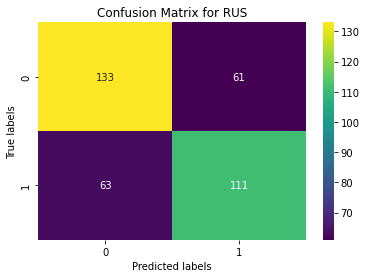

66.30434782608695


In [28]:
Y_pred = rus_def.predict(X_test)
print(classification_report(y_test, Y_pred))
cm = confusion_matrix(y_test, Y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="viridis", fmt='.4g' )
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for RUS')
ax.xaxis.set_ticklabels([0,1]); ax.yaxis.set_ticklabels([0,1])
plt.show()
print(accuracy_score(y_test, Y_pred)*100)

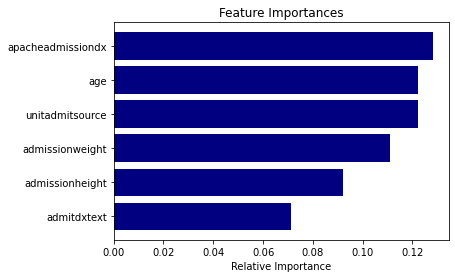

In [29]:
features = X_train.columns
importances = rus_def.feature_importances_ # Impurity-based feature importances
indices = np.argsort(importances) # Put feature with biggest importance at the top
plt.title('Feature Importances')
plt.barh(range(len(indices))[10:16], importances[indices][10:16], color='#000080')
plt.yticks(range(len(indices))[10:16], [features[i] for i in indices][10:16])
plt.xlabel('Relative Importance')
plt.show()